In [1]:
'''
TP 17/09/2023

Generate all the plots from JPDF data for 1 month

- plot 1 : JPDF density
- plot 2 : JPDF wc for each layer (surface to 2*mld)
- plot 3 : mean JPDF wc over the water column
- plot 4 : flux in front area

'''

from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime 
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import sys
from Tools_jpdf import*
import matplotlib.patches as mpatches

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

def add_contour_per_wc(H_sum_tot,proba_list,c):
    
    n = 0

    level = np.zeros(len(proba_list))
    p = np.zeros(len(proba_list))

    
    H_sum_tot_neg = abs(np.where(H_sum_tot < 0, H_sum_tot,0))
    H_sum_tot_pos = abs(np.where(H_sum_tot > 0, H_sum_tot,0))


    for proba in proba_list:


        i = dichotomie(f,-10,10,0.001,proba,H_sum_tot_neg)
        print(i)

        H_tot = np.sum(H_sum_tot_neg)

        H_filter = np.where(H_sum_tot_neg > 10**i, H_sum_tot_neg,0)
        p[n] = np.sum(H_filter)*100/H_tot

        level[n] = 10**i
        n=n+1

    fmt = {}
    for l, s in zip(level, p):
        #fmt[l] = str(round(s,1))+'%'
        fmt[l] = ''
    
    CS = plt.contour(xedges[1:],yedges[1:],H_sum_tot_neg,level,linewidths=2,alpha=0.8,colors=c)
    ax.clabel(CS,level, inline=1, fontsize=16,fmt = fmt)

    return level

def compute_fraction(H,H_wc):
        
    H_wc_neg = np.where(H_wc<0,H_wc,0)

    xx, yy = np.meshgrid(xedges[1:], yedges[1:])
    #H_80 £*= np.where(H < 10**x_80, H,0)
    H_f = np.where(xx > 0.5, H,0)
    H_f = np.where(yy > xx, H_f,0)
    
    H_f_wc = np.where(xx > 0.5, H_wc,0)
    H_f_wc = np.where(yy > xx, H_f_wc,0)

    H_f_per = np.sum(H_f)*100/np.sum(H)
    H_f_wc_per = np.sum(H_f_wc)*100/np.sum(H_wc_neg)
    
    return(H_f_per,H_f_wc_per,np.sum(H_f_wc))


# TO EDIT 

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#dir_save = 'figure/'
month = 'mar'


# JPDF data 
nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
H_w = np.asfortranarray(nc.variables['H_w'])[:,:,:,:]
gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
nc.close()

#xx, yy = np.meshgrid(xedges[1:], yedges[1:])

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

# JPDF SURF

0.6044921875


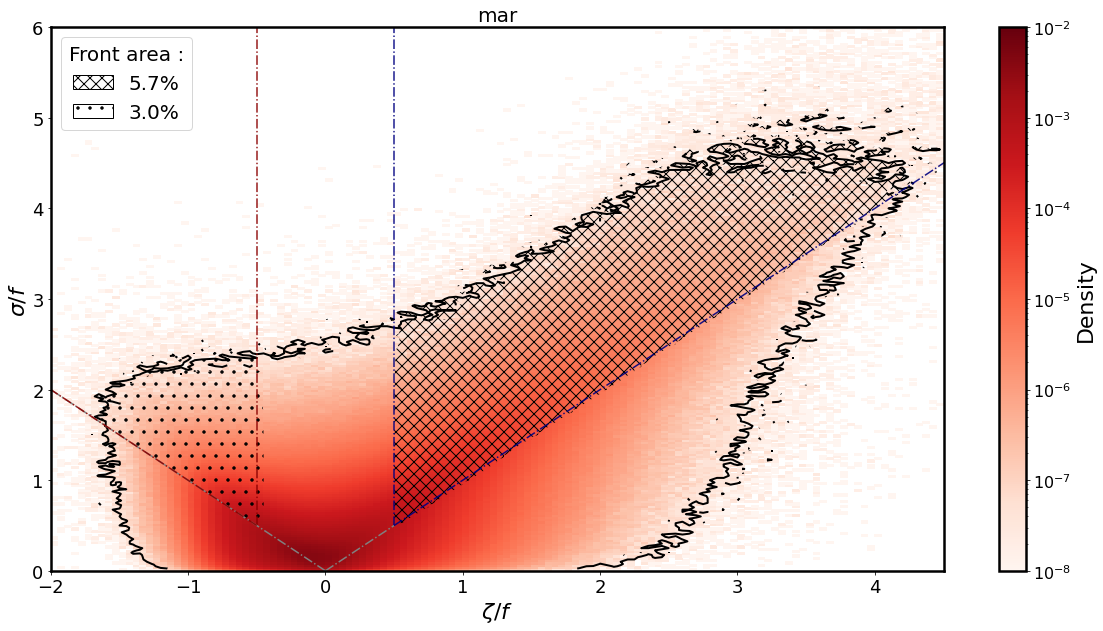

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20,10))

plt.title(month,size=20)

list_proba = [99.99]

H_sum = np.nansum(H[:,:,0,:],axis=2)
H_sum_norm = H_sum/np.sum(H_sum)
#H_wc_sum = H_wc[:,:,i,0]

ax = fig.add_subplot(1,1,1)
#plt.title(gap_list[i],size=20)

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)

plt.pcolormesh(xedges[:],yedges[:],H_sum_norm,norm=colors.LogNorm(vmin=1e-8, vmax=1e-2),cmap=plt.cm.Reds)
cbar = plt.colorbar()
cbar.set_label('Density', fontsize=22)
cbar.ax.tick_params(labelsize=16)

level,fmt = add_contour_per(H_sum,list_proba,c='k')

CS = plt.contour(xedges[1:],yedges[1:],H_sum,level,linewidths=2,alpha=1,colors='k',linestyles='-')


plt.clabel(CS,level, inline=1, fontsize=18,fmt = fmt)

### LES AJOUTS ####

x = np.linspace(0, 6, 100)
x = np.linspace(0, 6, 100)
x1 = np.linspace(0, 0.5, 100)
plt.plot(x1,x1,linestyle='-.',color='grey')
plt.plot(-x,x,linestyle='-.',color='grey')
plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

plt.xlabel(r'$\zeta/f$',fontsize=22); plt.ylabel(r'$\sigma/f$',fontsize=22)
plt.xlim(-2,4.5)
plt.ylim(0,6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

H_f = np.where(xx > 0.5, H_sum,0)
H_f = np.where(yy > xx, H_f,0)
plt.contourf(xedges[1:],yedges[1:],H_f,[level[0],1e10],colors='none',hatches=['xx'],extend='lower')

H_f_ac = np.where(xx < -0.5, H_sum,0)
H_f_ac = np.where(yy > -xx, H_f_ac,0)
plt.contourf(xedges[1:],yedges[1:],H_f_ac,[level[0],1e10],colors='none',hatches=['.'],extend='lower')


Hf_per = mpatches.Patch(hatch='xx', label=str(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))+'%',fill=False)
Hf_ac_per = mpatches.Patch(hatch='.', label=str(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))+'%',fill=False)
plt.legend(handles=[Hf_per,Hf_ac_per],loc=2, prop={'size': 20}, title = "Front area :", title_fontsize = 20)

#plt.savefig(dir_save+'jpdf_density_{0}.png'.format(month),dpi=400)

# JPDF w per layer for March

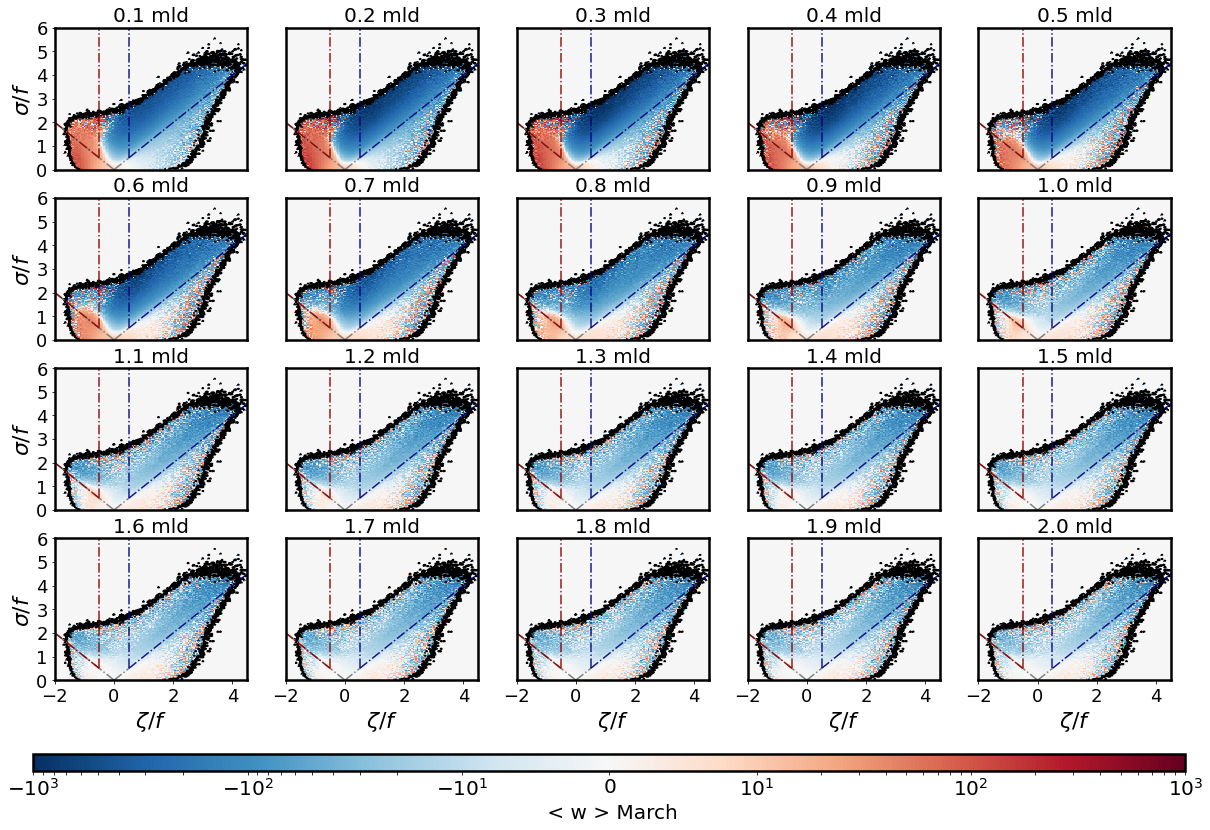

In [3]:
%matplotlib inline
import matplotlib.patches as mpatches

title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2} mld'.format(1-gap))
    
title_jpdf.append('surf')

per_sf_cyc = []
per_sf_cyc_wc = []
tot_flu_wc_cyc = []

fig = plt.figure(figsize=(20,12))
#plt.title(month,size=20)
plt.axis('off')

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)

list_proba = proba_list = [99.90]


for i in range(gap_list.shape[0]-1):
    
    ax = fig.add_subplot(4,5,20-i)
    
    CS = plt.contour(xedges[1:],yedges[1:],H_sum,level,linewidths=2,alpha=1,colors='k',linestyles='-')
    
    
    H_w_sum = np.nanmean(H_w[:,:,i,:],axis=2)
    H_w_sum = np.where(H_sum < level,0,H_w_sum)
    
    plt.title(title_jpdf[i],size=20)
    #ax.set_aspect('equal', 'box')
    cf = plt.pcolormesh(xedges[:],yedges[:],H_w_sum*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e1, linscale=1,
                                                       vmin=-1e3, vmax=1e3))
    x = np.linspace(0, 6, 100)
    x = np.linspace(0, 6, 100)
    x1 = np.linspace(0, 0.5, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey')
    plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

    plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

    plt.xlim(-2,4.5)
    plt.ylim(0,6)
    
    if i == 9 or i ==14 or i == 19:
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xticks([],fontsize=18)
        plt.yticks(fontsize=18)
        
    elif i == 4:
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        
    elif i < 4:
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks([], fontsize=18)
    
    else :
        plt.xticks([],fontsize=18)
        plt.yticks([],fontsize=18)

    #level = add_contour_per_wc(H_w_sum,list_proba,'k')
    
    H_f = np.where(xx > 0.5, H_w_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    
cbaxes = fig.add_axes([0.11, 0.02, 0.8, 0.02]) 
cb = plt.colorbar(cf,ax = ax, cax = cbaxes,orientation="horizontal")  
if month == "mar":
    cb.set_label(r' < w > March', fontsize=20)
else:
    cb.set_label(r' < w > {0}'.format(month), fontsize=20)
cb.ax.tick_params(labelsize=20)
#fig.tight_layout()

#dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#plt.savefig(dir_save+'jpdf_w_layers_{0}.png'.format(month),bbox_inches='tight',dpi=200)

# JPDF w at MLD for March

Text(0.5, 0, '$\\zeta/f$')

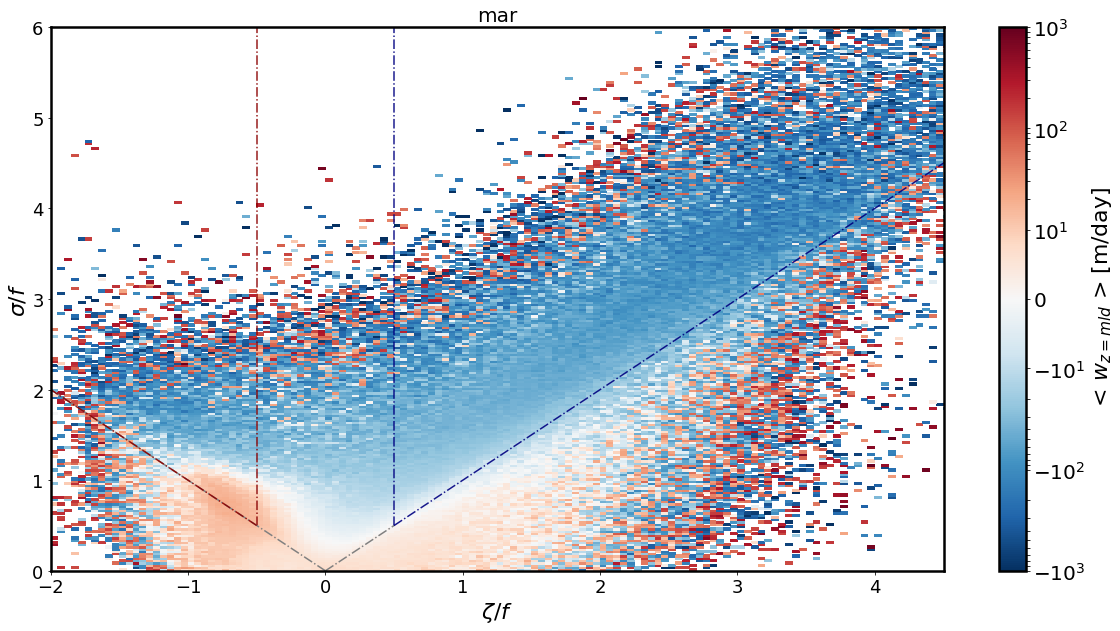

In [4]:
%matplotlib inline
import matplotlib.patches as mpatches

per_sf_cyc = []
per_sf_cyc_wc = []
tot_flu_wc_cyc = []

fig = plt.figure(figsize=(20,10))

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)

list_proba = proba_list = [99.90,80]

H_w_sum = np.nanmean(H_w[:,:,:,:],axis=3)
H_w_mld = H_w_sum[:,:,11]

plt.title(month,size=20)
#ax.set_aspect('equal', 'box')
plt.pcolormesh(xedges[:],yedges[:],H_w_mld*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e1, linscale=1,
                                                   vmin=-1e3, vmax=1e3))

cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
cb.set_label(r' < $w_{z=mld}$ > [m/day]', fontsize=22)

x = np.linspace(0, 6, 100)
x = np.linspace(0, 6, 100)
x1 = np.linspace(0, 0.5, 100)
plt.plot(x1,x1,linestyle='-.',color='grey')
plt.plot(-x,x,linestyle='-.',color='grey')
plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

plt.xlim(-2,4.5)
plt.ylim(0,6)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel(r'$\sigma/f$',fontsize=22)
plt.xlabel(r'$\zeta/f$',fontsize=22)

#level = add_contour_per_wc(H_w_mld,list_proba,'k')

#plt.savefig(dir_save+'jpdf_wc_mean_{0}.png'.format(month),dpi=400,bbox_inches='tight')

# JPDF wc MLD per layer for March

0.6044921875
-2.37762451171875
-0.44891357421875
0.6044921875
-2.35809326171875
-0.43426513671875
0.6044921875
-2.34222412109375
-0.41046142578125
0.6044921875
-2.32147216796875
-0.39642333984375
0.6044921875
-2.30377197265625
-0.36773681640625
0.6044921875
-2.28424072265625
-0.33782958984375
0.6044921875
-2.26898193359375
-0.30426025390625
0.6044921875
-2.25067138671875
-0.27191162109375
0.6044921875
-2.22869873046875
-0.23651123046875
0.6044921875
-2.18414306640625
-0.16632080078125
0.6044921875
-2.10906982421875
-0.01556396484375
0.6044921875
-2.07489013671875
-0.03082275390625
0.6044921875
-1.93267822265625
0.07171630859375
0.6044921875
-1.74530029296875
0.28289794921875
0.6044921875
-1.54571533203125
0.47149658203125
0.6044921875
-1.39190673828125
0.60760498046875
0.6044921875
-1.29669189453125
0.69976806640625
0.6044921875
-1.26190185546875
0.74493408203125
0.6044921875
-1.29180908203125
0.71441650390625
0.6044921875
-1.46514892578125
0.53924560546875


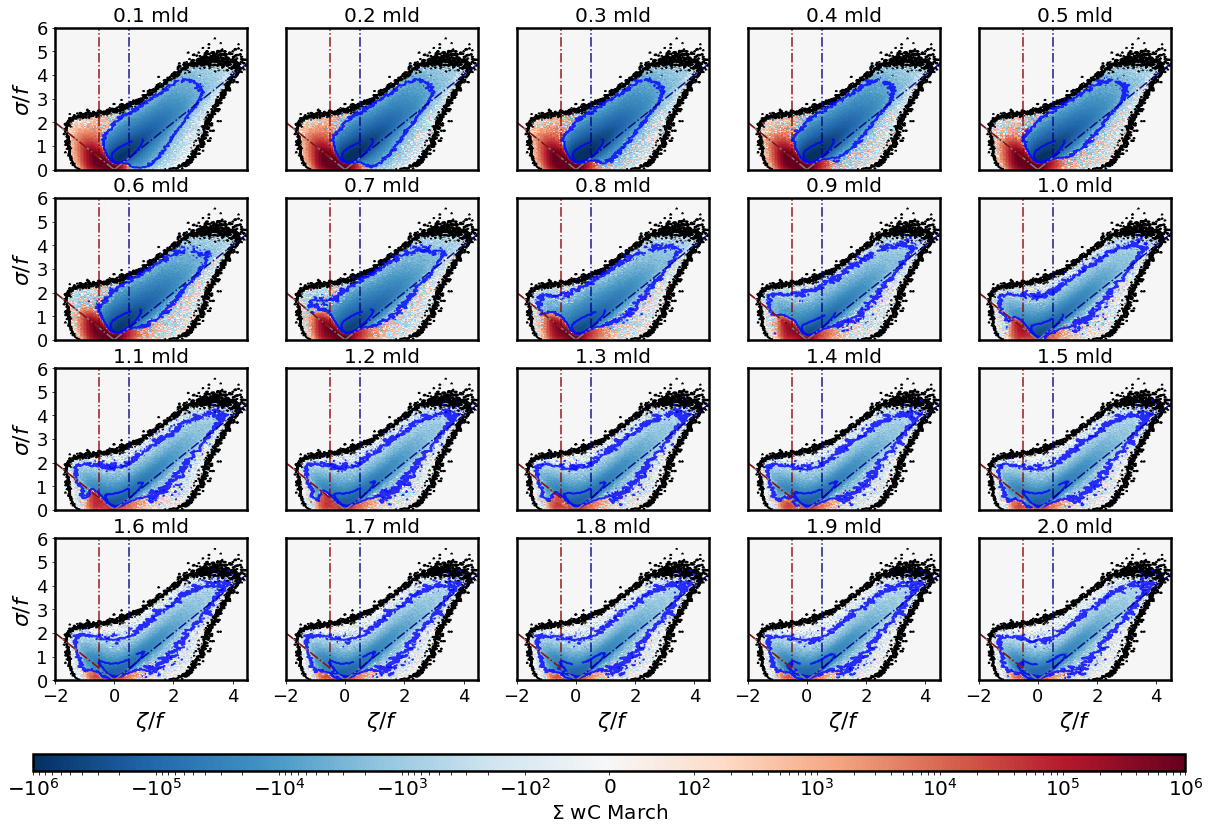

In [5]:
%matplotlib inline
import matplotlib.patches as mpatches

title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2} mld'.format(1-gap))
    
title_jpdf.append('surf')

per_sf_cyc = []
per_sf_cyc_wc = []
tot_flu_wc_cyc = []

fig = plt.figure(figsize=(20,12))
#plt.title(month,size=20)
plt.axis('off')

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)

list_proba_wc = [99,50]
list_proba = [99.99]

for i in range(gap_list.shape[0]-1):
    
    ax = fig.add_subplot(4,5,20-i)
    
    level,fmt = add_contour_per(H_sum,list_proba,c='k')
    CS = plt.contour(xedges[1:],yedges[1:],H_sum,level,linewidths=2,alpha=1,colors='k',linestyles='-')
    
    H_wc_sum = np.nansum(H_wc[:,:,i,:],axis=2)
    H_wc_sum = np.where(H_sum < level,0,H_wc_sum)
    
    plt.title(title_jpdf[i],size=20)
    #ax.set_aspect('equal', 'box')
    cf = plt.pcolormesh(xedges[:],yedges[:],H_wc_sum*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e2, linscale=1,
                                                       vmin=-1e6, vmax=1e6))
    x = np.linspace(0, 6, 100)
    x = np.linspace(0, 6, 100)
    x1 = np.linspace(0, 0.5, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey')
    plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

    plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

    plt.xlim(-2,4.5)
    plt.ylim(0,6)
    
    if i == 9 or i ==14 or i == 19:
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xticks([],fontsize=18)
        plt.yticks(fontsize=18)
        
    elif i == 4:
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        
    elif i < 4:
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks([], fontsize=18)
    
    else :
        plt.xticks([],fontsize=18)
        plt.yticks([],fontsize=18)

    level = add_contour_per_wc(H_wc_sum,list_proba_wc,'blue')
    
    H_f = np.where(xx > 0.5, H_wc_sum,0)
    H_f = np.where(yy > xx, H_f,0)
    
cbaxes = fig.add_axes([0.11, 0.02, 0.8, 0.02]) 
cb = plt.colorbar(cf,ax = ax, cax = cbaxes,orientation="horizontal")  
cb.set_label(r'$\Sigma$ wc {0}'.format(month), fontsize=20)
if month == "mar":
    cb.set_label(r'$\Sigma$ wC March', fontsize=20)
else:
    cb.set_label(r'$\Sigma$ wC {0}'.format(month), fontsize=20)
cb.ax.tick_params(labelsize=20)
#fig.tight_layout()
#plt.savefig(dir_save+'jpdf_wc_layers_{0}.png'.format(month),bbox_inches='tight',dpi=200)

# JPDF wc at MLD for March

In [6]:
H_wc.shape

(240, 240, 21, 230)

-2.93853759765625
-0.67474365234375


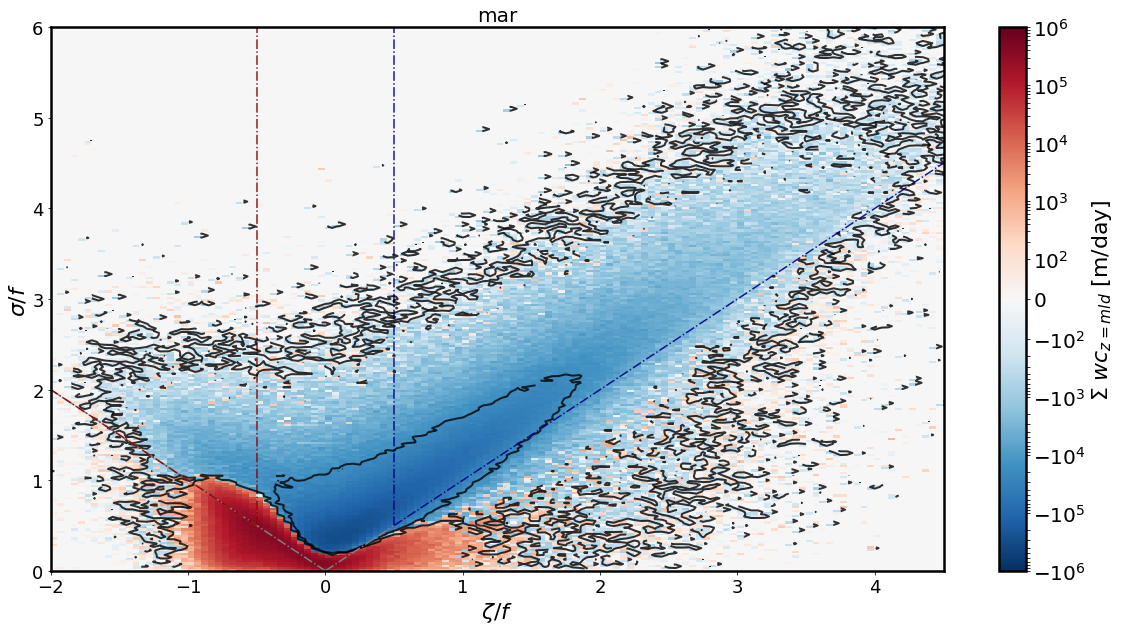

In [7]:
%matplotlib inline
import matplotlib.patches as mpatches

per_sf_cyc = []
per_sf_cyc_wc = []
tot_flu_wc_cyc = []

fig = plt.figure(figsize=(20,10))

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)

list_proba = proba_list = [99.90,80]

H_wc_sum = np.nansum(H_wc[:,:,:,:],axis=3)
H_wc_mld = H_wc_sum[:,:,11]

plt.title(month,size=20)
#ax.set_aspect('equal', 'box')
plt.pcolormesh(xedges[:],yedges[:],H_wc_mld*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e2, linscale=1,
                                                   vmin=-1e6, vmax=1e6))

cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
cb.set_label(r'$\Sigma$ $wc_{z=mld}$ [m/day]', fontsize=22)

x = np.linspace(0, 6, 100)
x = np.linspace(0, 6, 100)
x1 = np.linspace(0, 0.5, 100)
plt.plot(x1,x1,linestyle='-.',color='grey')
plt.plot(-x,x,linestyle='-.',color='grey')
plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

plt.xlim(-2,4.5)
plt.ylim(0,6)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel(r'$\sigma/f$',fontsize=22)
plt.xlabel(r'$\zeta/f$',fontsize=22)

level = add_contour_per_wc(H_wc_mld,list_proba,'k')

#plt.savefig(dir_save+'jpdf_wc_mean_{0}.png'.format(month),dpi=400,bbox_inches='tight')

# JPDF WC MLD MEAN

<ipython-input-5-3623f896dd68>:20: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  plt.pcolormesh(xedges[:],yedges[:],H_wc_mean*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e2, linscale=1,


-3.06915283203125
-0.00152587890625


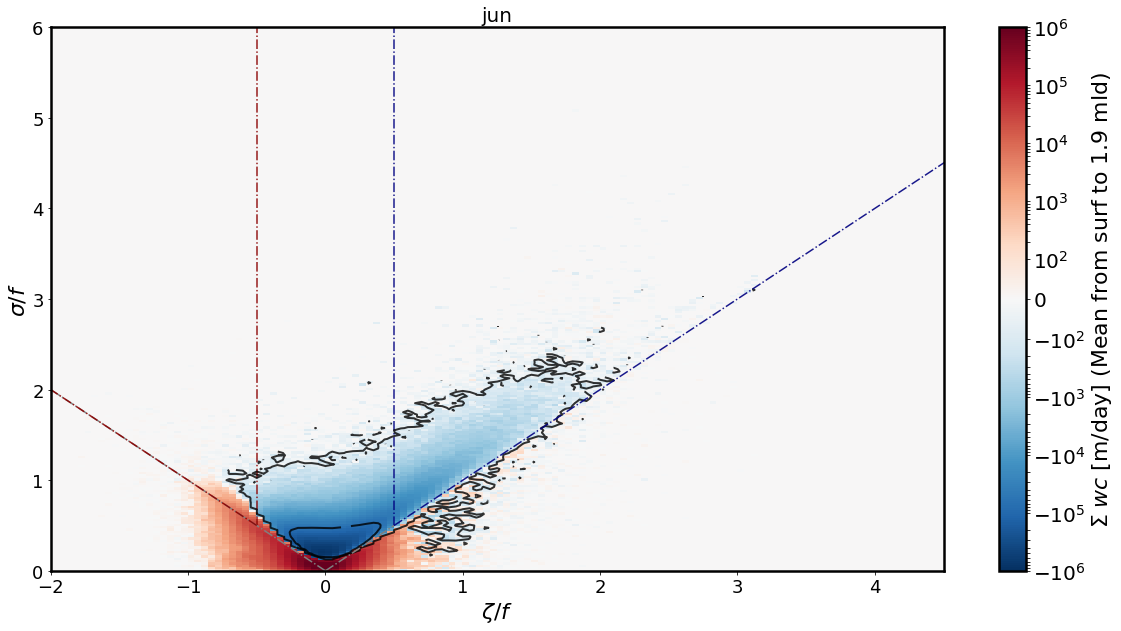

In [5]:
%matplotlib inline
import matplotlib.patches as mpatches

per_sf_cyc = []
per_sf_cyc_wc = []
tot_flu_wc_cyc = []

fig = plt.figure(figsize=(20,10))

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)

list_proba = proba_list = [99.90,80]

H_wc_sum = np.nansum(H_wc[:,:,:,:],axis=3)
H_wc_mean = np.nanmean(H_wc_sum[:,:,:],axis=2)

plt.title(month,size=20)
#ax.set_aspect('equal', 'box')
plt.pcolormesh(xedges[:],yedges[:],H_wc_mean*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e2, linscale=1,
                                                   vmin=-1e6, vmax=1e6))

cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
cb.set_label(r'$\Sigma$ $wc$ [m/day] (Mean from surf to 1.9 mld)', fontsize=22)

x = np.linspace(0, 6, 100)
x = np.linspace(0, 6, 100)
x1 = np.linspace(0, 0.5, 100)
plt.plot(x1,x1,linestyle='-.',color='grey')
plt.plot(-x,x,linestyle='-.',color='grey')
plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

plt.xlim(-2,4.5)
plt.ylim(0,6)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel(r'$\sigma/f$',fontsize=22)
plt.xlabel(r'$\zeta/f$',fontsize=22)

level = add_contour_per_wc(H_wc_mean,list_proba,'k')

#plt.savefig(dir_save+'jpdf_wc_mean_{0}.png'.format(month),dpi=400,bbox_inches='tight')

# Flux colonne

In [6]:
per_sf_c_wc = []
per_sf_ac_wc = []
tot_flu_wc_c= []
tot_flu_wc_ac= []

for i in range(gap_list.shape[0]):

    H_sum = np.nansum(H[:,:,i,:],axis=2)
    H_wc_sum = np.nansum(H_wc[:,:,i,:],axis=2)
    
    H_wc_neg = np.where(H_wc_sum<0,H_wc_sum,0)
    
    H_f_wc = np.where(xx > 0.5, H_wc_sum,0)
    H_f_wc = np.where(yy > xx, H_f_wc,0)
    
    H_f_wc_ac = np.where(xx < -0.5, H_wc_sum,0)
    H_f_wc_ac = np.where(yy > -xx, H_f_wc_ac,0)

    H_f_wc_per = np.sum(H_f_wc)*100/np.sum(H_wc_neg)
    H_f_wc_ac_per = np.sum(H_f_wc_ac)*100/np.sum(H_wc_neg)

    per_sf_c_wc.append(H_f_wc_per)
    per_sf_ac_wc.append(H_f_wc_ac_per)
    tot_flu_wc_c.append(-np.nansum(H_f_wc))
    tot_flu_wc_ac.append(-np.nansum(H_f_wc_ac))

Text(0.5, 1.0, '$\\Sigma$ wc jun')

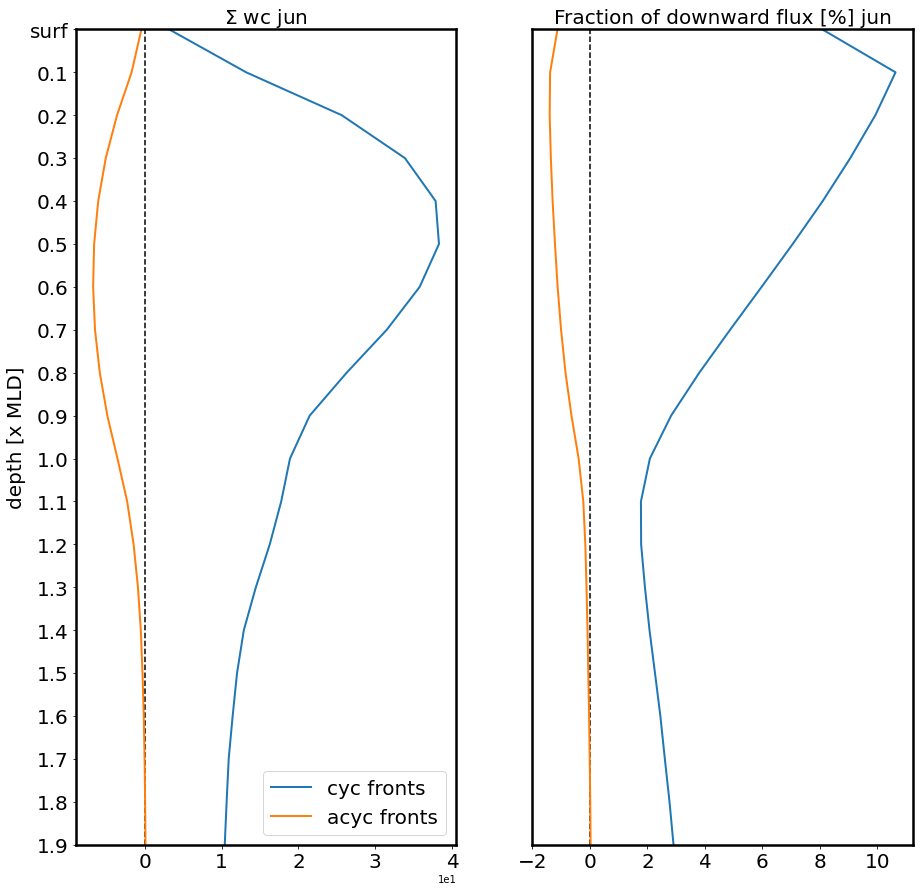

In [7]:
title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2}'.format(1-gap))
    
title_jpdf.append('surf')


fig = plt.figure(figsize=(15,15))
#plt.title(month,size=20)

ax = fig.add_subplot(1,2,2)
plt.plot(per_sf_c_wc,gap_list,label='cyc fronts',linewidth=2)
plt.plot(per_sf_ac_wc,gap_list,label='acyc fronts',linewidth=2)
#plt.xlim(-50,50)

#plt.yticks(gap_list,title_jpdf,size=20)
plt.yticks([],size=20)
plt.xticks(size=20)
#plt.legend(prop={'size': 20})
plt.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
plt.ylim(gap_list[0],gap_list[-1])
plt.title('Fraction of downward flux [%] {0}'.format(month),size=20)
#plt.grid()

ax = fig.add_subplot(1,2,1)
plt.plot(tot_flu_wc_c,gap_list,label='cyc fronts',linewidth=2)
plt.plot(tot_flu_wc_ac,gap_list,label='acyc fronts',linewidth=2)
#plt.xlim(-50,50)
plt.ylabel('depth [x MLD]',size=20)
plt.yticks(gap_list,title_jpdf,size=20)
#plt.yticks([],size=20)
plt.xticks(size=20)
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
#ax.ticklabel_format(style='scientific')
plt.legend(prop={'size': 20})
plt.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
#plt.hlines(0,np.min(tot_flu_wc_ac),np.max(tot_flu_wc_c),linestyles='-.',colors='k')
plt.ylim(gap_list[0],gap_list[-1])
plt.title(r'$\Sigma$ wc {0}'.format(month),size=20)
#plt.grid()
#plt.savefig(dir_save+'flux_wc_{0}.png'.format(month),dpi=400)

# W mean

<ipython-input-6-c376243b1fea>:7: RuntimeWarning: Mean of empty slice
  H_w_mean = np.nanmean(H_w[:,:,i,:],axis=2)


Text(0.5, 1.0, ' < w > mar')

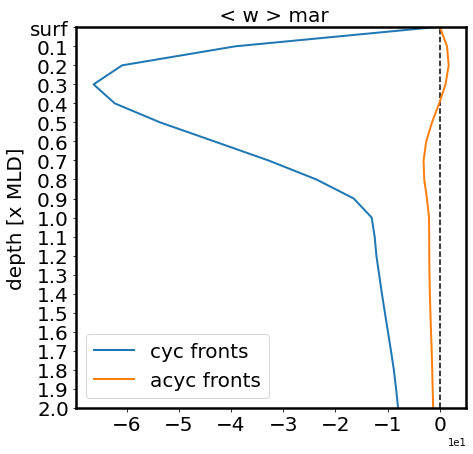

In [6]:

tot_flu_w_c= []
tot_flu_w_ac= []

for i in range(gap_list.shape[0]):

    H_sum = np.nansum(H[:,:,i,:],axis=2)
    H_w_mean = np.nanmean(H_w[:,:,i,:],axis=2)
    
    H_wc_neg = np.where(H_w_mean<0,H_w_mean,0)
    
    H_f_w_c = np.where(xx > 0.5, H_w_mean,0)
    H_f_w_c = np.where(yy > xx, H_f_w_c,0)
    
    H_f_w_ac = np.where(xx < -0.5, H_w_mean,0)
    H_f_w_ac = np.where(yy > -xx, H_f_w_ac,0)

    tot_flu_w_c.append(np.nanmean(H_f_w_c)*24*3600)
    tot_flu_w_ac.append(np.nanmean(H_f_w_ac)*24*3600)
    
title_jpdf = []
for gap in gap_list[:-1]:
    title_jpdf.append('{:.2}'.format(1-gap))
    
title_jpdf.append('surf')


fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(1,1,1)

plt.plot(tot_flu_w_c,gap_list,label='cyc fronts',linewidth=2)
plt.plot(tot_flu_w_ac,gap_list,label='acyc fronts',linewidth=2)
#plt.xlim(-50,50)
plt.ylabel('depth [x MLD]',size=20)
plt.yticks(gap_list,title_jpdf,size=20)
#plt.yticks([],size=20)
plt.xticks(size=20)
plt.ticklabel_format(style='sci', axis='x',scilimits=(0,0))
#ax.ticklabel_format(style='scientific')
plt.legend(prop={'size': 20})
plt.vlines(0,gap_list[0],gap_list[-1],linestyles='--',colors='k')
#plt.hlines(0,np.min(tot_flu_wc_ac),np.max(tot_flu_wc_c),linestyles='-.',colors='k')
plt.ylim(gap_list[0],gap_list[-1])
plt.title(r' < w > {0}'.format(month),size=20)
#plt.grid()
#plt.savefig(dir_save+'flux_wc_{0}.png'.format(month),dpi=400)